In [4]:
from msclap import CLAP
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import pandas as pd
import os

In [5]:
specialities = pd.read_csv('/mounts/ud-data/moran/2605f1a5-ab8c-46a3-82f6-ef63769dba00/data/temp_shared/james_noise_datasets/noise_datasets.csv', header=None)
display(specialities)

print(list(specialities[0]))

,0
0,/work/data_cloud/speech_enhancement/formatted_...
1,/work/data_cloud/speech_enhancement/formatted_...
2,/work/data_cloud/speech_enhancement/formatted_...
3,/work/data_cloud/speech_enhancement/formatted_...
4,/work/data_cloud/speech_enhancement/formatted_...
...,...
119,/work/data_cloud/speech_enhancement/formatted_...
120,/work/data_cloud/speech_enhancement/formatted_...
121,/work/data_cloud/speech_enhancement/formatted_...
122,/work/data_cloud/speech_enhancement/formatted_...


['/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/CarNoisesDevSetShu2000Ep1773HardCurV2_mat/CarNoisesDevSetShu2000Ep1773HardCurV2.csv', '/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/SirensAna8hAug400hDevSetV2_mat/SirensAna8hAug400hDevSetV2.csv', '/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/BabbleNoiseDatasetMohamedDevSetShu2000Ep1773HardCurV2_mat/BabbleNoiseDatasetMohamedDevSetShu2000Ep1773HardCurV2.csv', '/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/contractMusicMohamedNonvocalDevSetShu2000Ep1773HardCurV2_mat/contractMusicMohamedNonvocalDevSetShu2000Ep1773HardCurV2.csv', '/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/SirensNoiseDatasetAnaDevSet_mat/SirensNoiseDatasetAnaDevSet.csv', '/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/HumanNoisesDevSet_mat/HumanNoisesDevSet.csv', '/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16

In [14]:

cloud = pd.read_csv('/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/CarNoisesDevSetShu2000Ep1773HardCurV2_mat/CarNoisesDevSetShu2000Ep1773HardCurV2.csv')
display(cloud)
print(cloud['srcFilename'][0])
print(cloud['dstFilename'][0])
print('\n\n\n')
print(cloud['srcFilename'][1])
print(cloud['dstFilename'][1])
print('\n\n\n')
print(cloud['srcFilename'][124])
print(cloud['dstFilename'][124])

,0
0,/work/data_cloud/speech_enhancement/formatted_...
1,/work/data_cloud/speech_enhancement/formatted_...
2,/work/data_cloud/speech_enhancement/formatted_...
3,/work/data_cloud/speech_enhancement/formatted_...
4,/work/data_cloud/speech_enhancement/formatted_...
...,...
119,/work/data_cloud/speech_enhancement/formatted_...
120,/work/data_cloud/speech_enhancement/formatted_...
121,/work/data_cloud/speech_enhancement/formatted_...
122,/work/data_cloud/speech_enhancement/formatted_...


/work/data_cloud/speech_enhancement/formatted_data/dev_data/noise_16k/CarNoisesDevSetShu2000Ep1773HardCurV2_mat/CarNoisesDevSetShu2000Ep1773HardCurV2.csv


,srcFilename,dstFilename,fileSize,fileFs,fileFmt,avgEnergy,block,blockSize
0,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/000/16...,192000,16000,single,-13.650470,1,192000
1,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/000/20...,192000,16000,single,-14.150436,1,192000
2,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/000/21...,192000,16000,single,-14.754433,1,192000
3,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/000/22...,192000,16000,single,-13.788460,1,192000
4,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/000/22...,192000,16000,single,-12.917914,1,192000
...,...,...,...,...,...,...,...,...
120,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/004/76...,192000,16000,single,-16.271910,1,192000
121,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/004/80...,192000,16000,single,-21.163006,2,192000
122,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/004/87...,192000,16000,single,-16.248513,1,192000
123,chris_watson_no_speech/backup/scratch/noise/dr...,CarNoisesDevSet_mat/CarNoisesDevSet_000/004/88...,192000,16000,single,-15.399623,2,192000


chris_watson_no_speech/backup/scratch/noise/driving/chris_watson_no_speech/24_Hour_Day_Night_Driving_in_the_Heavy_Rain_with_Thunder_Ambiance_for_Relaxation_Sleep_atMeditation_1223.wav
CarNoisesDevSet_mat/CarNoisesDevSet_000/000/160.mat




chris_watson_no_speech/backup/scratch/noise/driving/chris_watson_no_speech/24_Hour_Day_Night_Driving_in_the_Heavy_Rain_with_Thunder_Ambiance_for_Relaxation_Sleep_atMeditation_178.wav
CarNoisesDevSet_mat/CarNoisesDevSet_000/000/200.mat




chris_watson_no_speech/backup/scratch/noise/driving/chris_watson_no_speech/_HD__Rush_Hour_at_Haymarket_24072015_022.wav
CarNoisesDevSet_mat/CarNoisesDevSet_000/005/038.mat


In [54]:
specialities = pd.read_csv('specialities.csv')
display(specialities)

speciality_subtypes_v1 = {
    'bell':['bell'],
	'bird':['wild_animals'],
	'car':['engine', 'vehicle'],
	'car_cabin': ['engine', 'vehicle'],
	'dog':['domestic animals/pets'],
	'door':['generic impact sounds', 'domestic sounds/home sounds'],
	'eating':['surface contact', 'generic impact sounds', 'food packaging', 'eating/digestive'],
	'fan':['fan/air conditioning'],
	'kids_screaming':['other', 'instrumental music'],
	'kitchen_noises':['domestic sounds/home sounds', 'generic impact sounds'],
	'low_rev_engines':['engine'],
	'water':['liquid/water'],
	'wind':['weather']
}

speciality_subtypes_v2 = {
    'bell':['bell'],
	'bird':['wild_animals'],
	'car':['engine', 'vehicle'],
	'car_cabin': ['vehicle'],
	'dog':['domestic animals/pets'],
	'door':['generic impact sounds', 'domestic sounds/home sounds'],
	'eating':['eating/digestive'],
	'fan':['fan/air conditioning'],
	'kids_screaming':['other', 'instrumental music'],
	'kitchen_noises':['domestic sounds/home sounds'],
	'low_rev_engines':['engine'],
	'water':['liquid/water'],
	'wind':['weather']
}

,speciality,meta_csv,audios
0,bell,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
1,bird,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
2,car,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
3,car,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
4,car_cabin,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
5,dog,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
6,door,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
7,eating,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
8,fan,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...
9,kids_screaming,/bucket/data_collection/datasets/purchased_dat...,/bucket/data_collection/datasets/purchased_dat...


In [64]:
metadf_dict={}
speciality_dict={}
for row in specialities.itertuples(index=False):
    #print(f"working on {row.speciality}")
    csv = pd.read_csv(row.meta_csv)
    #print(csv['sub_type'].value_counts())
    csv = csv[csv['sub_type'].isin(speciality_subtypes_v2[row.speciality])]
    #print(csv['sub_type'].value_counts())
    
    metadf_dict[row.speciality] = csv
    
    audio_paths = metadf_dict[row.speciality]['filepath']
    speciality_dict[row.speciality] = list(audio_paths)

In [65]:
prompt_mapping_v1 = {'water':'water',
                  'eating':'eating',
                  'car_cabin':'inside of car',
                  'bell':'bell',
                  'door':'door',
                  'wind':'wind',
                  'bird':'bird',
                  'kitchen_noises':'kitchen appliances cooking',
                  'kids_screaming':'kids screaming',
                  'car':'car',
                  'dog':'dog',
                  'low_rev_engines':'engine',
                  'fan':'fan'}

prompt_mapping_v2 = {'water':'water',
                  'eating':'eat',
                  'car_cabin':'inside car',
                  'bell':'bell',
                  'door':'door',
                  'wind':'wind',
                  'bird':'bird',
                  'kitchen_noises':'kitchen',
                  'kids_screaming':'kids',
                  'car':'car',
                  'dog':'dog',
                  'low_rev_engines':'engine',
                  'fan':'fan'}

In [66]:
records = []
for specialty, file_paths in speciality_dict.items():
    specialty_prompt = prompt_mapping_v2[specialty]
    #specialty_prompt = specialty
    for file_path in file_paths:
        records.append({'specialty': specialty_prompt, 'file_path': file_path})

# Create a DataFrame
df = pd.DataFrame(records)
print(df['specialty'].value_counts())

specialty
water         1945
bell          1582
door          1582
inside car     960
wind           865
car            650
kitchen        555
eat            520
engine         493
kids           466
dog            462
fan            164
Name: count, dtype: int64


In [67]:
classes = df['specialty'].unique()

class_id_map = {name: i for i, name in enumerate(classes, 0)}
print(class_id_map)

prompt = 'this is the sound of '
y = [prompt + x for x in classes]


{'bell': 0, 'car': 1, 'inside car': 2, 'dog': 3, 'door': 4, 'eat': 5, 'fan': 6, 'kids': 7, 'kitchen': 8, 'engine': 9, 'water': 10, 'wind': 11}


In [69]:
# Load and initialize CLAP
clap_model = CLAP(version = '2023', use_cuda=True)

# Computing text embeddings
text_embeddings = clap_model.get_text_embeddings(y)

In [70]:
# Computing audio embeddings
y_preds, y_labels = [], []
print(os.getcwd())

for i in tqdm(range(len(df ))):
    label, path = df.iloc[i]
    idx = class_id_map[label]
    #print(idx)
    one_hot_target = torch.nn.functional.one_hot(torch.tensor([idx]), num_classes=len(classes)+1)

    audio_embeddings = clap_model.get_audio_embeddings([path], resample=True)
    similarity = clap_model.compute_similarity(audio_embeddings, text_embeddings)

    y_pred = F.softmax(similarity.detach().cpu(), dim=1).numpy()

    y_preds.append(y_pred)
    y_labels.append(one_hot_target.detach().cpu().numpy())


/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


  0%|          | 1/10244 [00:00<21:19,  8.00it/s]

100%|██████████| 10244/10244 [12:34<00:00, 13.57it/s]


In [71]:
y_lab, y_pred = np.concatenate(y_labels, axis=0), np.concatenate(y_preds, axis=0)
y_label_val = np.argmax(y_lab, axis=1)
y_pred_val = np.argmax(y_pred, axis=1)
acc = accuracy_score(np.argmax(y_lab, axis=1), np.argmax(y_pred, axis=1))
print('Speciality Accuracy {}'.format(acc))

Speciality Accuracy 0.7924638812963686


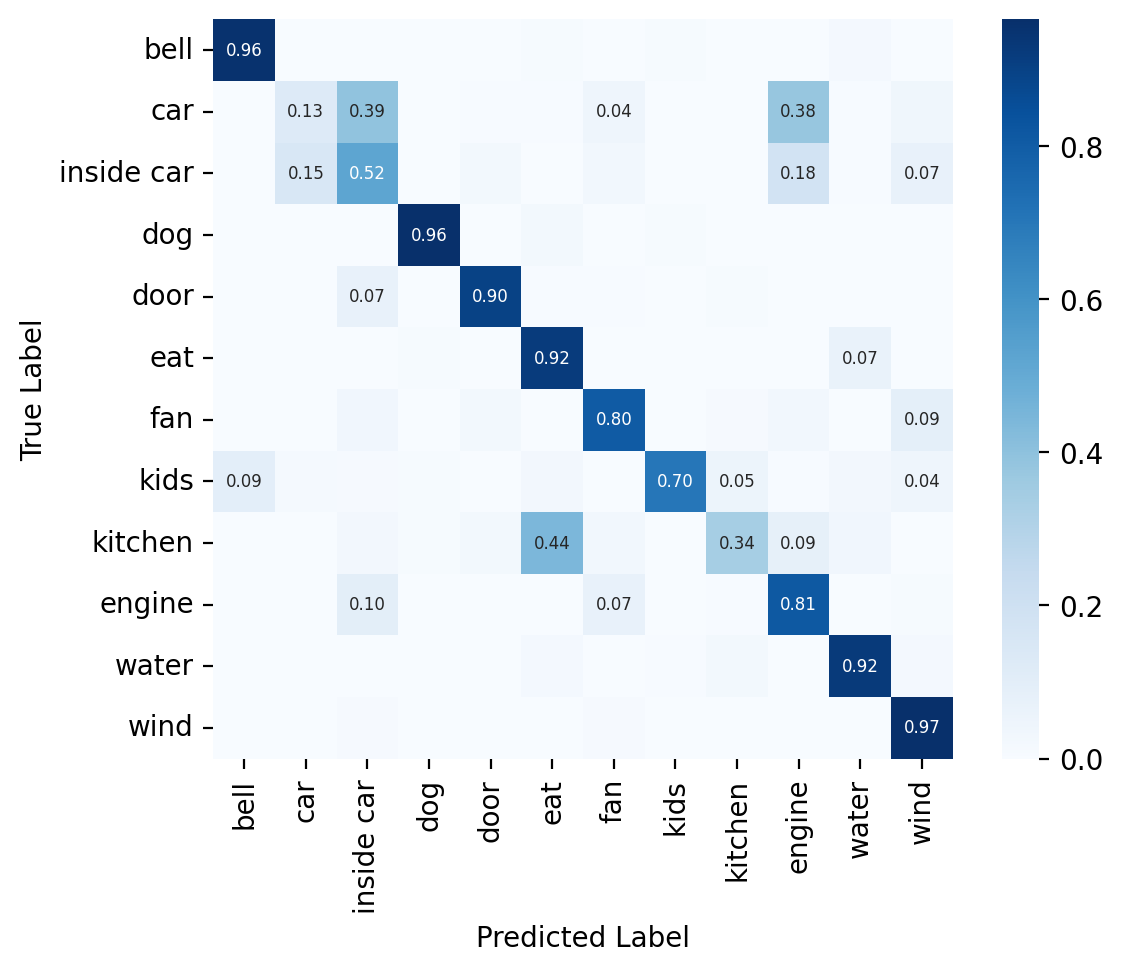

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# get confusion matrix
conf_matrix = confusion_matrix(y_label_val,y_pred_val)
conf_mat_norm_recall = conf_matrix.astype('float32')/conf_matrix.sum(axis=1)[:,np.newaxis]
recall_by_class = np.diagonal(conf_mat_norm_recall)
mean_recall = np.mean(recall_by_class)

# Calculate row sums to use for percentages
row_sums = conf_matrix.sum(axis=1)

# Calculate percentages
percentages = (conf_matrix.T / row_sums).T  # Transpose for division, then transpose back

# Format percentages as strings with '%' symbol
annot_data = [['{:.2f}'.format(val) for val in row] for row in percentages]
annot_data = [['' if float(val <= 0.04) else '{:.2f}'.format(val) for val in row] for row in percentages]

plt.figure(dpi=200)

annot_kws = {'size': 6}
ax = sns.heatmap(percentages, xticklabels=classes, yticklabels=classes, annot=annot_data, fmt='', square=True, cmap='Blues', annot_kws=annot_kws)
ax.set_xlabel('Predicted Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('True Label')

#plt.subplots_adjust(left=0.2, bottom=0.35)
plt.show()